<a href="https://colab.research.google.com/github/micaellimaj/analise/blob/main/Aprova%C3%A7%C3%A3odecredito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprovação de crédito

### Introdução

Nesse exercício utilizaremos técnica de aprendizado de máquina (Agrupamento) para seguimentar clientes com base em algumas predições, sendo importante para uma boa estratégia de marketing, capitação de novos clientes, investimentos futuros e etc. o banco de dados utilizado foi retirado do seguinte link do kaggle https://www.kaggle.com/code/gabrieloliveirasan/aprova-o-de-cr-dito/input e traz dados contendo informações relevantes sobre determinada fonte.

### Atributos

Abaixo estão os atributos mais relevantes para o projeto:


*   **ID**:número do cliente;
*  	**CODE_GENDER**: gênero;
*   **FLAG_OWN_CAR**: se os usuários têm um carro;
*   **FLAG_OWN_REALTY**: existe uma propriedade;
*   **CNT_CHILDREN**: Número de filhos;
*   **AMT_INCOME_TOTAL**: Rendimento anual;
*   **NAME_INCOME_TYPE**: Categoria de renda;
*   **NAME_EDUCATION_TYPE**: nível de educação;
*   **NAME_FAMILY_STATUS**: Estado civil;
*   **NAME_HOUSING_TYPE**: Modo de viver.






### Atividade 1



*   importe as biblotecas que serão utilizadas
*   tragar os dados para a máquina
*   verifique se há valores nulos, se sim, resolva o problema





In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
model = KMeans()

In [5]:
nome_arquivo = "application_record.csv"
dataframe = pd.read_csv(nome_arquivo)
dataframe.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0


In [6]:
valores_nulos = dataframe.isnull().values.any()

if valores_nulos:
    print("Há valores nulos na tabela.")
else:
    print("Não há valores nulos na tabela.")

Há valores nulos na tabela.


In [7]:
valores_faltantes = dataframe.isnull().sum()
print(valores_faltantes)

ID                        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        1
NAME_HOUSING_TYPE         1
DAYS_BIRTH                1
DAYS_EMPLOYED             1
FLAG_MOBIL                1
FLAG_WORK_PHONE           1
FLAG_PHONE                1
FLAG_EMAIL                1
OCCUPATION_TYPE        5263
CNT_FAM_MEMBERS           1
dtype: int64


In [8]:
#substituindo os valores nulos da coluna especificada por desconhecido
dataframe['OCCUPATION_TYPE'].fillna("desconhecido", inplace=True)

In [9]:
dataframe['NAME_FAMILY_STATUS'].fillna("desconhecido", inplace=True)

In [10]:
dataframe['NAME_HOUSING_TYPE'].fillna("desconhecido", inplace=True)

In [11]:
dataframe['DAYS_BIRTH'].fillna("desconhecido", inplace=True)

In [12]:
dataframe['DAYS_EMPLOYED'].fillna("desconhecido", inplace=True)

In [13]:
#substituindo os valores nulos da coluna especificada pela mediana
FLAG_MOBIL_median = dataframe.FLAG_MOBIL.median()
dataframe.fillna(FLAG_MOBIL_median, inplace = True)
dataframe.FLAG_MOBIL.isnull().sum()

0

In [14]:
FLAG_WORK_PHONE_median = dataframe.FLAG_WORK_PHONE.median()
dataframe.fillna(FLAG_WORK_PHONE_median, inplace = True)
dataframe.FLAG_WORK_PHONE.isnull().sum()

0

In [15]:
FLAG_PHONE_median = dataframe.FLAG_PHONE.median()
dataframe.fillna(FLAG_PHONE_median, inplace = True)
dataframe.FLAG_PHONE.isnull().sum()

0

In [16]:
FLAG_EMAIL_median = dataframe.FLAG_EMAIL.median()
dataframe.fillna(FLAG_EMAIL_median, inplace = True)
dataframe.FLAG_EMAIL.isnull().sum()

0

In [17]:
#verificando os dados atualizados
dataframe.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,desconhecido,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,desconhecido,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0


### Atividade 2



* Trate os atributos categóricos



In [18]:
dataframe[['ID','CODE_GENDER']].head()

,ID,CODE_GENDER
0,5008804,M
1,5008805,M
2,5008806,M
3,5008808,F
4,5008809,F


In [19]:
dataframe['FLAG_OWN_CAR'] = dataframe['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0})

In [20]:
dataframe.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,1,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,desconhecido,2.0
1,5008805,M,1,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,desconhecido,2.0
2,5008806,M,1,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0
3,5008808,F,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0
4,5008809,F,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0


Acima a coluna 'FLAG_OWN_CAR' foi tranformada em valores binários para facilitar o tratamento dos dados futuros, o valor 1 significa que eles possuem carro, e o 0 que não possuem.

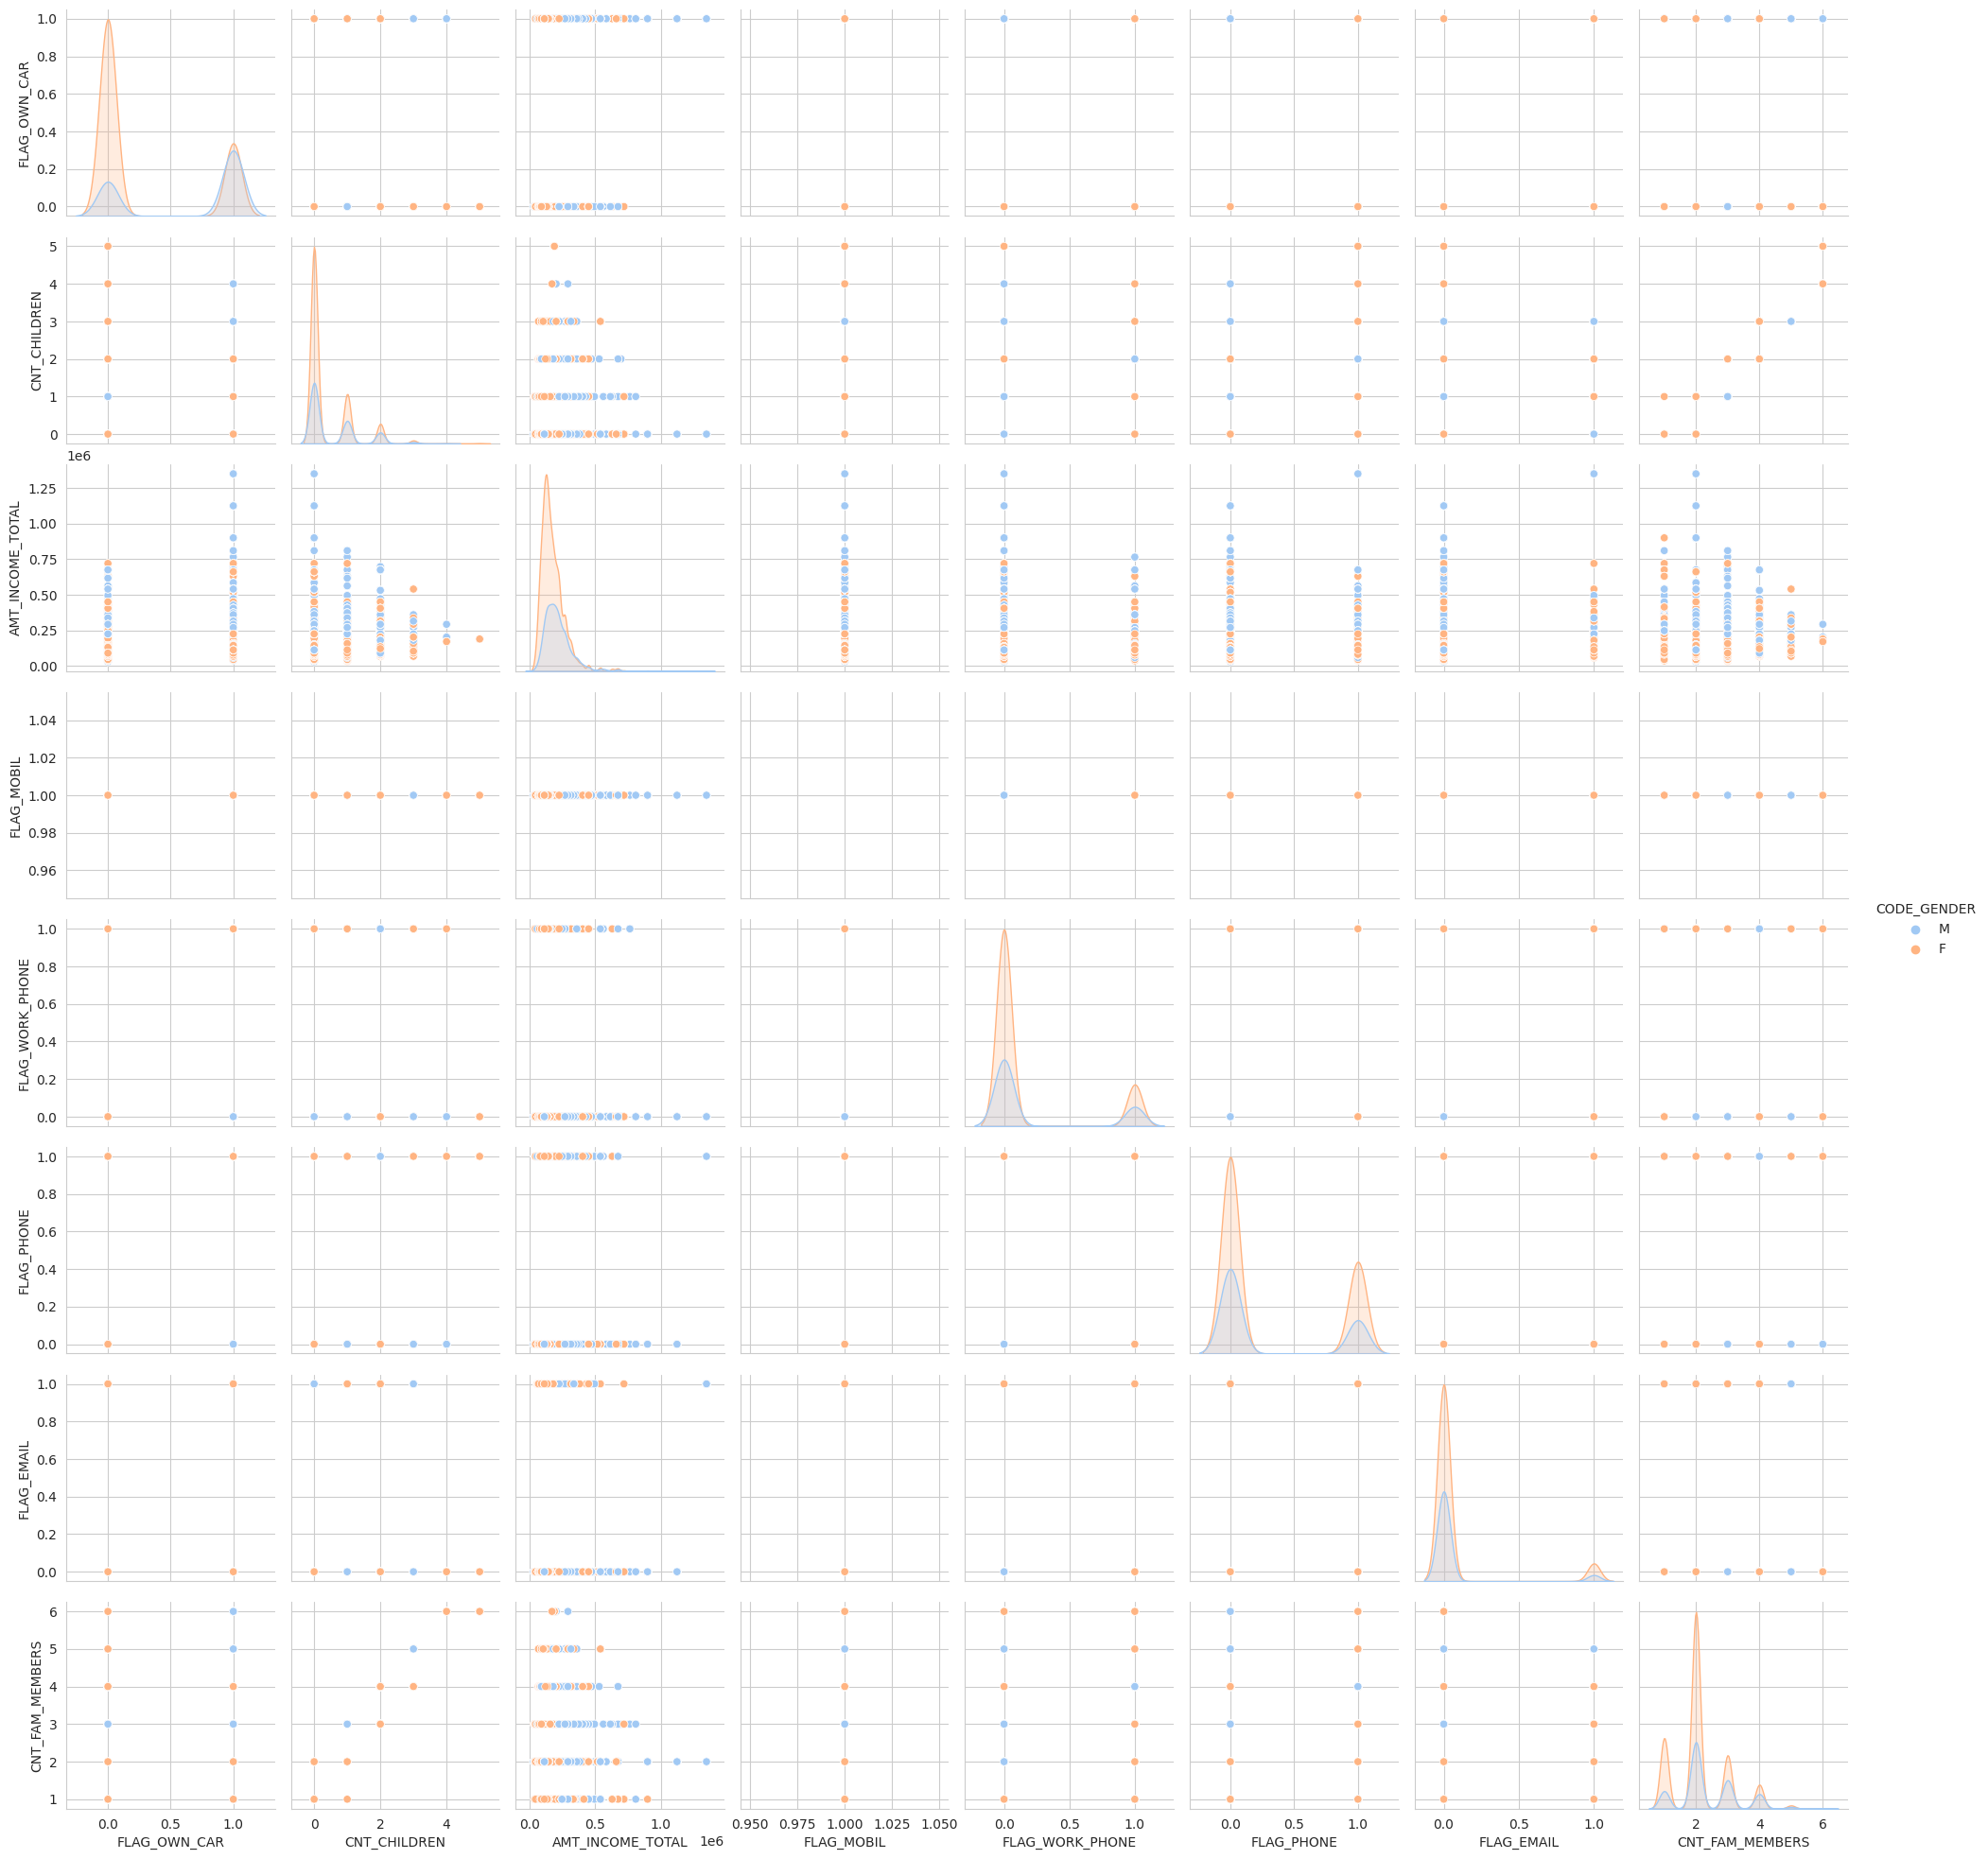

In [21]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=dataframe.drop("ID", axis=1), hue="CODE_GENDER", palette="pastel")

Acima, percebemos que o grande conjunto de informações não facilita a  visualização, então vamos selecionar as colunas necessárias para fazer as possíveis predições.

### Atividade 3

**EXEMPLO 1: Digamos que uma revendedora de carros quer saber qual o perfil de vendas do seu público para direcionar investimento nas ações de marketing e publicidade. Agora vamos selecionar os atributos desejados.**

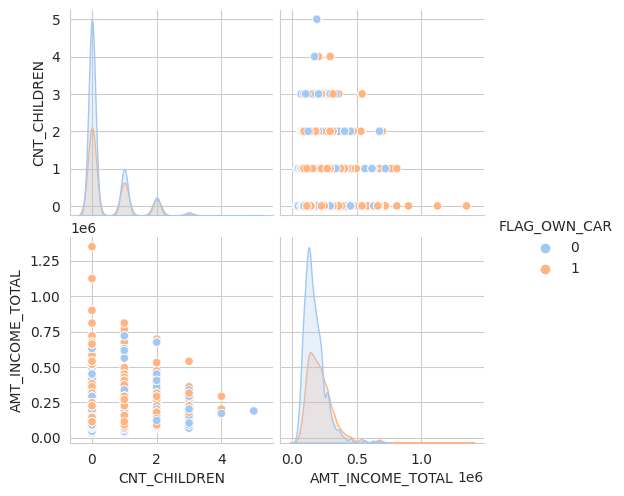

In [22]:
colunas_desejadas = ["FLAG_OWN_CAR", "CNT_CHILDREN", "AMT_INCOME_TOTAL"]

with sns.axes_style('whitegrid'):
    grafico = sns.pairplot(data=dataframe[colunas_desejadas].dropna(), hue="FLAG_OWN_CAR", palette="pastel")

Observando o gráfico acima, podemos notar que as pessoas que possuem maior renda, tendem a ter veículos e pessoas que possuem pelo mensos um filho, tem carro, enquanto de dois para cima ,  possui menos.

In [23]:
data = dataframe[["CNT_CHILDREN", "AMT_INCOME_TOTAL","FLAG_OWN_CAR"]]

In [24]:
data.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_OWN_CAR
0,0,427500.0,1
1,0,427500.0,1
2,0,112500.0,1
3,0,270000.0,0
4,0,270000.0,0


Treino:

In [25]:
model = KMeans(n_clusters=5)
model = model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
model.__dict__

{'n_clusters': 5,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 'warn',
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_OWN_CAR'], dtype=object),
 'n_features_in_': 3,
 '_tol': 342679.44833738176,
 '_n_init': 10,
 '_algorithm': 'lloyd',
 '_n_threads': 2,
 'cluster_centers_': array([[4.46099291e-01, 3.58034043e+05, 6.39716312e-01],
        [3.84487952e-01, 1.08547252e+05, 2.78463855e-01],
        [4.50885208e-01, 2.49379630e+05, 5.07709880e-01],
        [5.74626866e-01, 6.57990672e+05, 6.75373134e-01],
        [4.17913386e-01, 1.76889338e+05, 3.77165354e-01]]),
 '_n_features_out': 5,
 'labels_': array([0, 0, 1, ..., 0, 0, 1], dtype=int32),
 'inertia_': 18037633448712.664,
 'n_iter_': 4}

In [27]:
#visualizando os agrupamentos
clusters = model.labels_
clusters = pd.DataFrame(clusters, columns=['cluster'])
clusters.head()

,cluster
0,0
1,0
2,1
3,2
4,2


In [28]:
clustered_data = pd.concat([data, clusters], axis=1)
clustered_data.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_OWN_CAR,cluster
0,0,427500.0,1,0
1,0,427500.0,1,0
2,0,112500.0,1,1
3,0,270000.0,0,2
4,0,270000.0,0,2


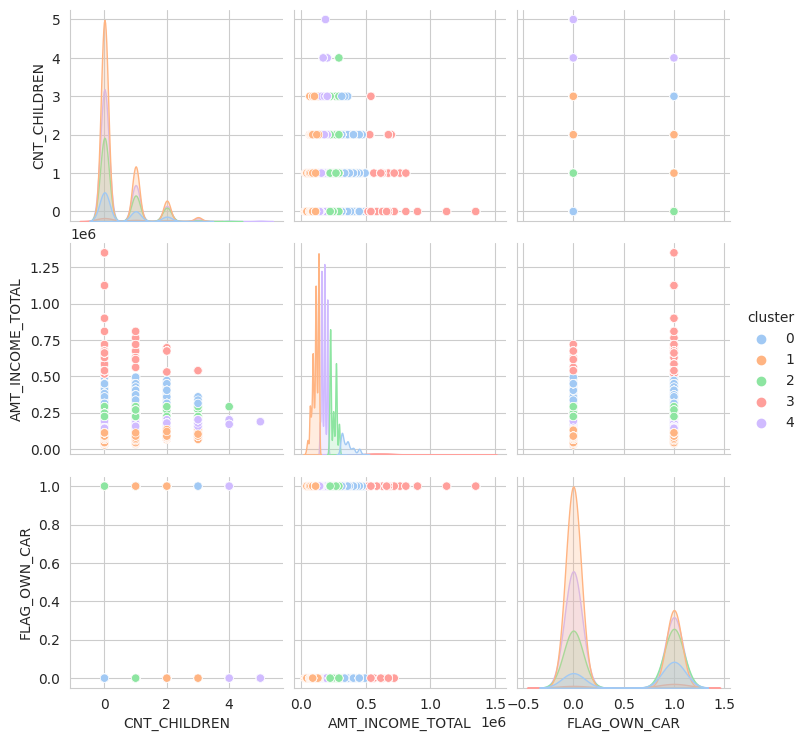

In [29]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

Com o gráfico acima, podemos tirar conclusões a respeito do número de filhos para investir em propagandas de carros para a família ou a renda familiar para saber até quanto podem pagar pelo veículo.

In [30]:
# posição dos centróides
clusters_centers = model.cluster_centers_
clusters_centers = pd.DataFrame(clusters_centers, columns=["CNT_CHILDREN", "AMT_INCOME_TOTAL","FLAG_OWN_CAR"])
clusters_centers.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_OWN_CAR
0,0.446099,358034.042553,0.639716
1,0.384488,108547.251506,0.278464
2,0.450885,249379.630211,0.507710
3,0.574627,657990.671642,0.675373
4,0.417913,176889.337795,0.377165


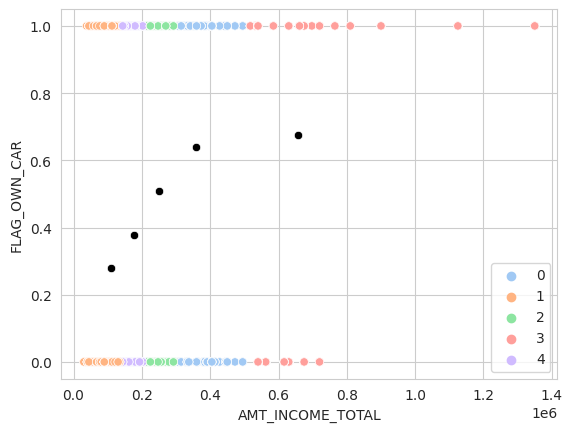

In [31]:
with sns.axes_style('whitegrid'):

  fig, ax = plt.subplots()
  sns.scatterplot(data=clustered_data,   x='AMT_INCOME_TOTAL', y='FLAG_OWN_CAR', hue='cluster', palette="pastel", ax=ax)
  sns.scatterplot(data=clusters_centers, x='AMT_INCOME_TOTAL', y='FLAG_OWN_CAR', color='black', ax=ax)

Avaliação:

In [32]:
wcss = []

for k in range(1, 11):

  model = KMeans(n_clusters=k)
  model = model.fit(data)
  wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<ipython-input-33-2ab4f683a5c6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(x=range(1, 11), y=wcss, marker="8", palette="pastel")


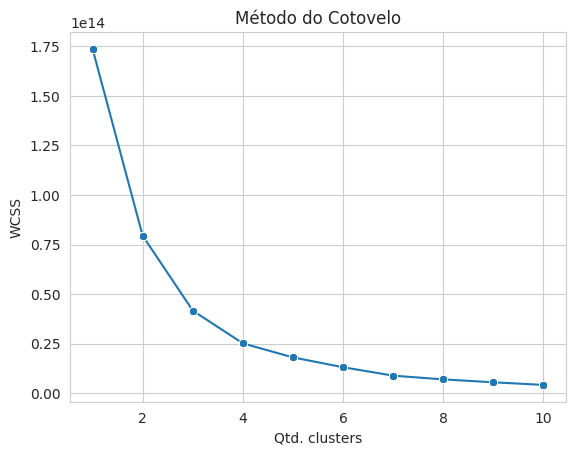

In [33]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(x=range(1, 11), y=wcss, marker="8", palette="pastel")
  grafico.set(title='Método do Cotovelo', ylabel='WCSS', xlabel='Qtd. clusters');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


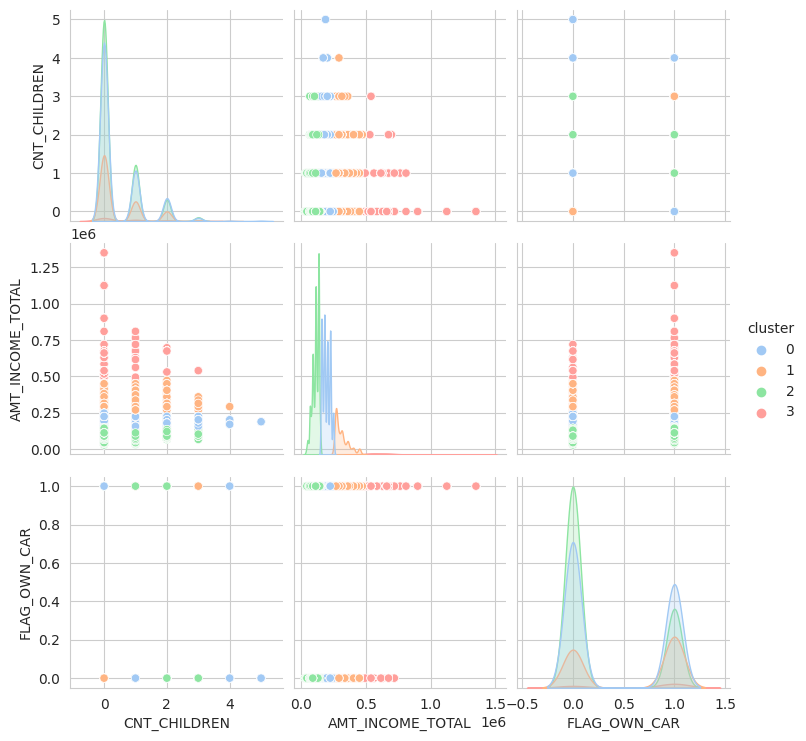

In [34]:
model = KMeans(n_clusters=4)
model = model.fit(data)

clusters = model.labels_
clustered_data = pd.concat([data, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

Com os dados treinados, avaliados e selecionados, vamos realizar as predições que motivaram o projeto.


**EMPRESA 'X' DE REVENDER CARROS**

Uma empresa X que revende carros precisa que o analista de dados faça predições com os dados vistos, para melhor segmentar seus clientes, assim investindo corretamente em ações de marketing e vendas, portanto, evitando gastos desnecessários.

*   cluster = 3

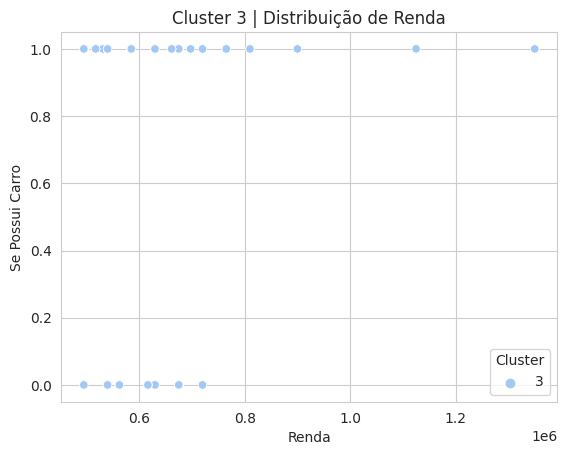

In [35]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=clustered_data.query('cluster == 3'), x="AMT_INCOME_TOTAL", y="FLAG_OWN_CAR", hue="cluster", palette="pastel")
  grafico.set(title='Cluster 3 | Distribuição de Renda', xlabel='Renda', ylabel='Se Possui Carro');
  grafico.get_legend().set_title("Cluster");

Acima podemos vizualizar que os valores 0 e 1 do eixo y, representam, respectivamente, as pessoas que não possuem carro e as que possuem. Percebemos que esse gráfico, se trata de pesssoas que possuem uma renda menor e que não podem pagar caro por um carro.



*   Cluster = 2


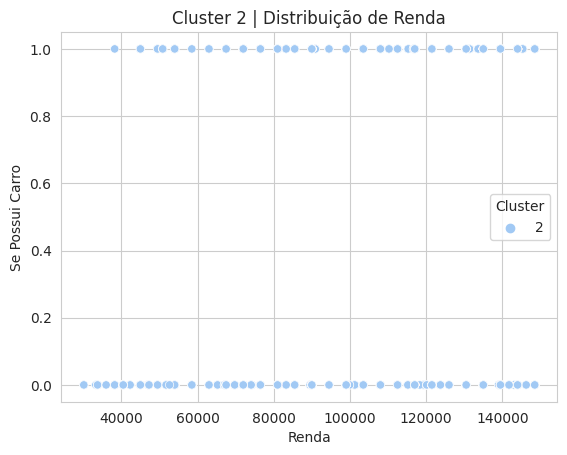

In [36]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=clustered_data.query('cluster == 2'), x="AMT_INCOME_TOTAL", y="FLAG_OWN_CAR", hue="cluster", palette="pastel")
  grafico.set(title='Cluster 2 | Distribuição de Renda', xlabel='Renda', ylabel='Se Possui Carro');
  grafico.get_legend().set_title("Cluster");

Acima, mostra potencias clientes que tem uma condição financeira mais favorável e podem investir em um veículo.


*   cluster = 1

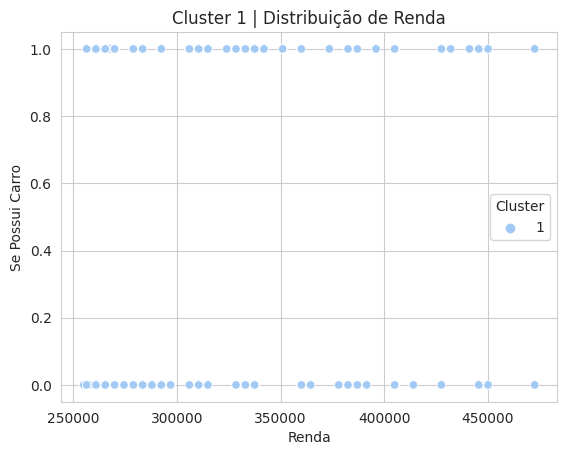

In [37]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=clustered_data.query('cluster == 1'), x="AMT_INCOME_TOTAL", y="FLAG_OWN_CAR", hue="cluster", palette="pastel")
  grafico.set(title='Cluster 1 | Distribuição de Renda', xlabel='Renda', ylabel='Se Possui Carro');
  grafico.get_legend().set_title("Cluster");

Agora , essa visualização mostram os potenciais clientes que possuem a maior renda entre o grupo, que são os que podem investir um preço caro em um carro, principalmente, se já possuirem um veículos quiserem mais outro.



*   Cluster = 0



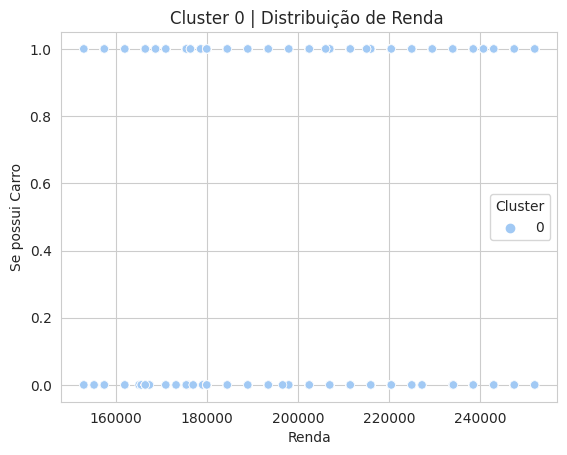

In [38]:
with sns.axes_style('whitegrid'):

  grafico =sns.scatterplot(data=clustered_data.query('cluster ==0'),x="AMT_INCOME_TOTAL",y="FLAG_OWN_CAR",hue="cluster",palette="pastel")
  grafico.set(title='Cluster 0 | Distribuição de Renda ', xlabel='Renda', ylabel='Se possui Carro');
  grafico.get_legend().set_title("Cluster");

O gráfico acima, mostra clientes que possuem um bom potencial de investir em um carro.

In [46]:
# se possui carro / renda / qnt.filhos
cliente = np.array([0,450000,4])

In [47]:
cluster = model.predict(cliente.reshape(1, -1))
print(cluster)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Com a predição, vemos que está no grupo 1, que possui maior renda.

### Atividade 4

**EXEMPLO 2: Uma empresa Y que vende produtos infantis como roupas e brinquedos para crianças e adolescentes precisa que o analista de dados faça predições com os dados vistos, para melhor segmentar seus clientes.**

In [48]:
data2 = dataframe[["CNT_CHILDREN", "AMT_INCOME_TOTAL"]]

In [49]:
data2.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL
0,0,427500.0
1,0,427500.0
2,0,112500.0
3,0,270000.0
4,0,270000.0


Vamos treinar os dados, como fizemos no exemplo anterior.

In [50]:
model = KMeans(n_clusters=5)
model = model.fit(data2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
model.__dict__

{'n_clusters': 5,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 'warn',
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['CNT_CHILDREN', 'AMT_INCOME_TOTAL'], dtype=object),
 'n_features_in_': 2,
 '_tol': 514019.17249415506,
 '_n_init': 10,
 '_algorithm': 'lloyd',
 '_n_threads': 2,
 'cluster_centers_': array([[4.65614431e-01, 3.85168546e+05],
        [4.39974355e-01, 1.89429377e+05],
        [3.91724337e-01, 1.10134710e+05],
        [5.92307692e-01, 6.62313462e+05],
        [3.91388673e-01, 2.77059083e+05]]),
 '_n_features_out': 5,
 'labels_': array([0, 0, 2, ..., 0, 0, 2], dtype=int32),
 'inertia_': 18250388825213.906,
 'n_iter_': 4}

In [52]:
#visualizando os agrupamentos
clusters = model.labels_
clusters = pd.DataFrame(clusters, columns=['cluster'])
clusters.head()

,cluster
0,0
1,0
2,2
3,4
4,4


In [53]:
clustered_data = pd.concat([data2, clusters], axis=1)
clustered_data.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,cluster
0,0,427500.0,0
1,0,427500.0,0
2,0,112500.0,2
3,0,270000.0,4
4,0,270000.0,4


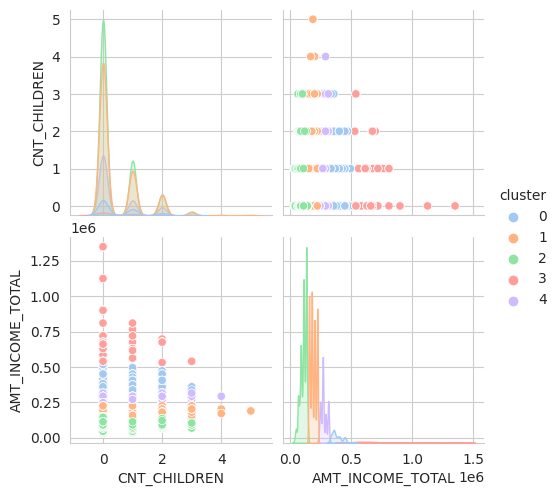

In [54]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

In [55]:
# posição dos centróides
clusters_centers = model.cluster_centers_
clusters_centers = pd.DataFrame(clusters_centers, columns=['CNT_CHILDREN','AMT_INCOME_TOTAL'])
clusters_centers.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL
0,0.465614,385168.545660
1,0.439974,189429.377464
2,0.391724,110134.710208
3,0.592308,662313.461538
4,0.391389,277059.082622


Avaliação:

In [56]:
wcss = []

for k in range(1, 11):

  model = KMeans(n_clusters=k)
  model = model.fit(data2)
  wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<ipython-input-57-2ab4f683a5c6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(x=range(1, 11), y=wcss, marker="8", palette="pastel")


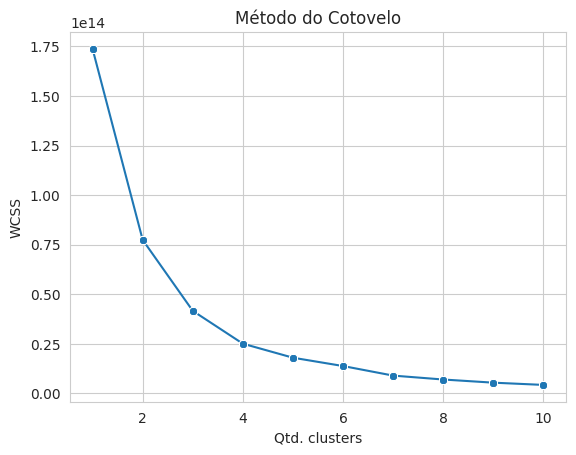

In [57]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(x=range(1, 11), y=wcss, marker="8", palette="pastel")
  grafico.set(title='Método do Cotovelo', ylabel='WCSS', xlabel='Qtd. clusters');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


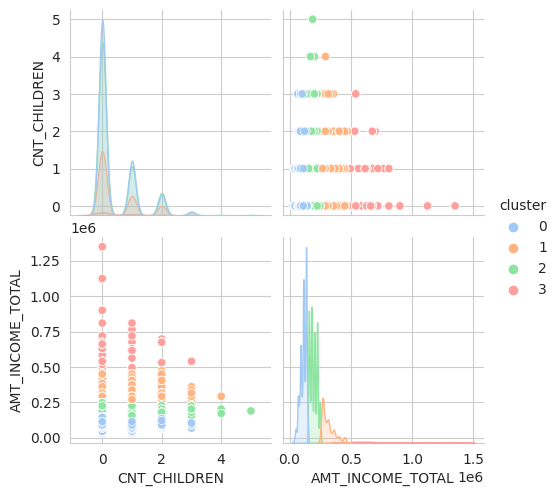

In [58]:
model = KMeans(n_clusters=4)
model = model.fit(data2)

clusters = model.labels_
clustered_data = pd.concat([data2, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

Com o modelo treinado, avaliado e selecionado, está na hora de utilizarmos para resolver problemas reais que motivaram a sua construção.

**EMPRESA Y DE PRODUTOS INFANTIS**

Para melhorar segmentar as ações de vendas e marketing, a empresa precisa entender qual é o perfil dos potenciais clientes.



*  Cluster = 3



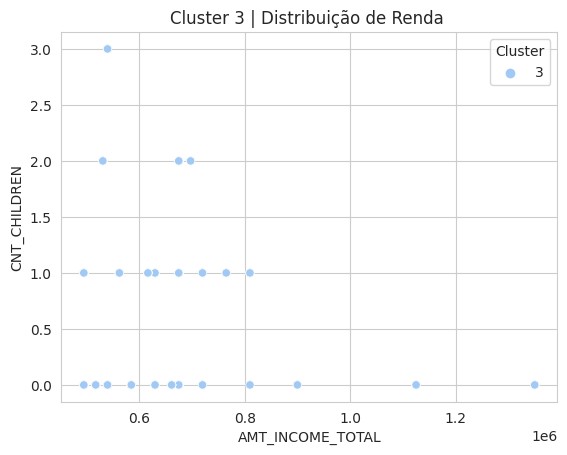

In [59]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=clustered_data.query('cluster == 3'), x="AMT_INCOME_TOTAL", y="CNT_CHILDREN", hue="cluster", palette="pastel")
  grafico.set(title='Cluster 3 | Distribuição de Renda ', xlabel='AMT_INCOME_TOTAL', ylabel='CNT_CHILDREN');
  grafico.get_legend().set_title("Cluster");



*   Cluster = 2




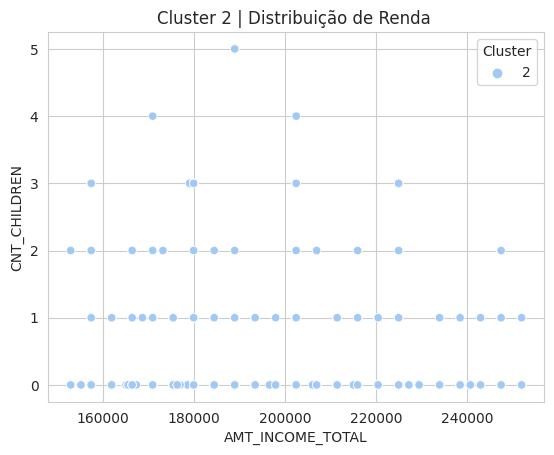

In [60]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=clustered_data.query('cluster == 2'), x="AMT_INCOME_TOTAL", y="CNT_CHILDREN", hue="cluster", palette="pastel")
  grafico.set(title='Cluster 2 | Distribuição de Renda ', xlabel='AMT_INCOME_TOTAL', ylabel='CNT_CHILDREN');
  grafico.get_legend().set_title("Cluster");



*   Cluster = 1



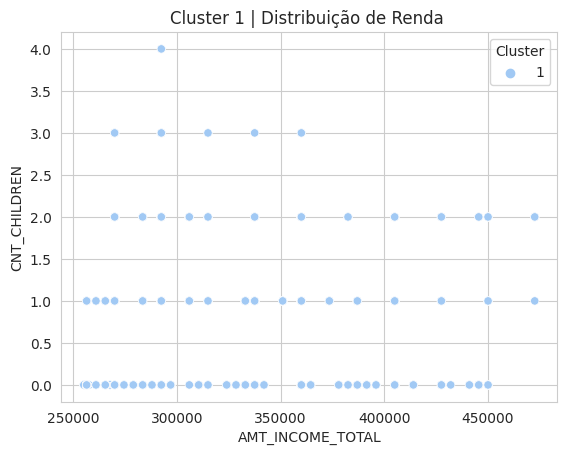

In [61]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=clustered_data.query('cluster == 1'), x="AMT_INCOME_TOTAL", y="CNT_CHILDREN", hue="cluster", palette="pastel")
  grafico.set(title='Cluster 1 | Distribuição de Renda ', xlabel='AMT_INCOME_TOTAL', ylabel='CNT_CHILDREN');
  grafico.get_legend().set_title("Cluster");



*   Cluster = 0



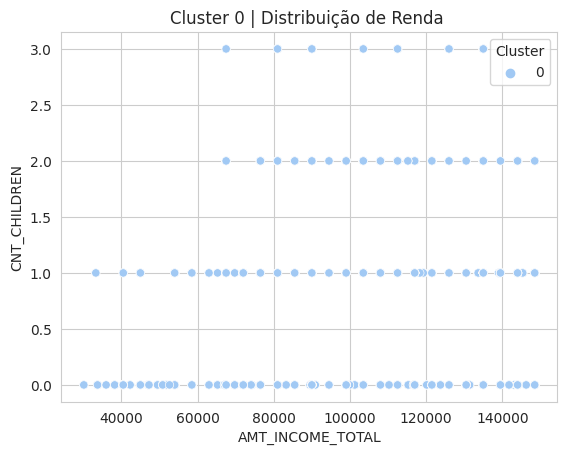

In [62]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=clustered_data.query('cluster == 0'), x="AMT_INCOME_TOTAL", y="CNT_CHILDREN", hue="cluster", palette="pastel")
  grafico.set(title='Cluster 0 | Distribuição de Renda ', xlabel='AMT_INCOME_TOTAL', ylabel='CNT_CHILDREN');
  grafico.get_legend().set_title("Cluster");

**Predição**

In [63]:
# qnt.filhos / renda
cliente = np.array([2, 5000000])

In [64]:
cluster = model.predict(cliente.reshape(1, -1))
print(cluster)

[3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


### Interferências e Conclusões

*   Pudemos utilizar técinas de agrupamento para preparar a análise
*   Identificamos o perfil de clientes por meio de dois exemplos práticos
*   Comparamos os diferentes grupos de clusters e geramos insights relevantes
*   Também fizemos predições com os dados vistos

